In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import json 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import joblib
df = pd.read_csv('data.csv', skipinitialspace=True)


In [73]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
num_vars = [var for var in df.columns if var not in cat_vars]

print(f"Num of categorical var: {len(cat_vars)} \nNum of cumerical var: {len(cat_vars)}")

Num of categorical var: 9 
Num of cumerical var: 9


In [74]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean().sort_values(ascending=False)

occupation        0.056601
workclass         0.056386
native-country    0.017905
dtype: float64

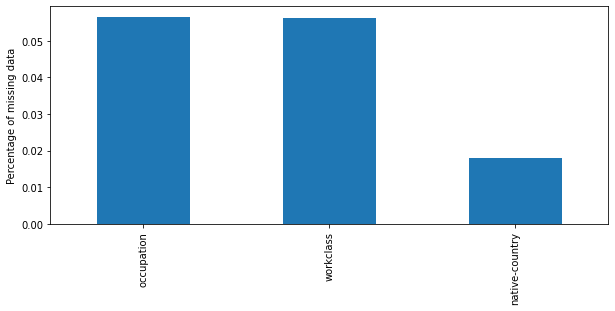

In [75]:
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.show()

 We only have a couple of variables with missing values. The simplest way to deal would be imputing them with the mode since they are all categorical. Then we will implement the LabelConvert() class from sklearn to encode all of the categories.

In [76]:
x_cols = [c for c in df.columns if c != 'income']
X = df[x_cols]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)


In [77]:
mode = dict(X_train.mode().iloc[0])
X_train = X_train.fillna(mode)

In [78]:
encoders = {}
for column in ['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race',
                'sex','native-country']:
    categorical_convert = LabelEncoder()
    X_train[column] = categorical_convert.fit_transform(X_train[column])
    encoders[column] = categorical_convert

In [79]:
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X_train, y_train)

In [80]:
mode = dict(X_test.mode().iloc[0])
X_test = X_test.fillna(mode)

In [81]:
encoders = {}
for column in ['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race',
                'sex','native-country']:
    categorical_convert = LabelEncoder()
    X_test[column] = categorical_convert.fit_transform(X_test[column])
    encoders[column] = categorical_convert

In [82]:
y_pred_test = rf.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8577570323056135

In [84]:
joblib.dump(mode, "./train_mode.joblib", compress=True)
joblib.dump(encoders, "./encoders.joblib", compress=True)
joblib.dump(rf, "./random_forest.joblib", compress=True)

['./random_forest.joblib']